Optimization is ubiquitious. What more needs to be said?

Basic optimization problem:
$$ \min_x f\left(x\right) $$ $$\text{subject to} \; x\in \mathcal{X} $$
where $\mathcal{X}$ is some spatial set called the *feasible region*. We must search over the feasible region to find variable values which optimize the objective function $f$.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 


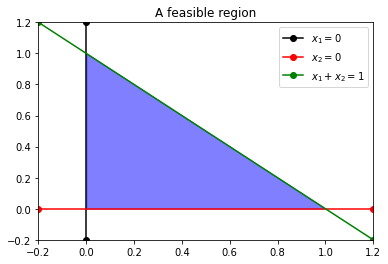

In [21]:
x = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.fill_between(x,0,1-x, color='b',alpha=0.5)
ax.plot([0,0],[-.2,1.2], color='k', marker='o', label=r"$x_1=0$")
ax.plot([-.2,1.2], [0,0],color='r', marker='o', label=r"$x_2=0$")
ax.plot([-0.2,1.2], [1.2,-0.2],color='g', marker='o', label=r"$x_1+x_2 = 1$")
ax.set_xlim([-.2,1.2])
ax.set_ylim([-.2,1.2])
ax.set_title("A feasible region")
ax.legend()

A local minimizer is a point $x^*$ such that there exists a local neighborhood of $x^*$ with all $x$ in the region satisfying $f\left(x\right) >= f\left(x^*\right)$. More precisely, $x^*$ is a local minimizer of $f$ such that there exists some $\delta >0$ with $$ \left| x - x^* \right|<\delta \implies  f\left(x^*\right) \leq f\left(x\right) $$ This is easy to understand. A strong (strict) local minimizer is such that the $\leq$ is replaced by a $<$ for all $x\neq x^*$ in the region.

Having zero derivative is necessary but not sufficient for a local minimizer. Why? Assume we have non-zero derivative $f'\left(x^*\right)$ at local minimizer $x^*$. Then $$ 0 < f'\left(x^*\right)= \lim_{h\rightarrow 0} \frac{f\left(x^*+h\right)-f\left(x^*\right)}{h} $$ Since $x^*$ is a local minimum, we have some $\delta' >0$ with $\left|x-x^*\right|<\delta' \implies f\left(x^*\right) \leq f\left(x\right).$
By the definition of limit, there is some $\delta >0$ such that $$ \left| x-x^*\right| < \delta \implies \left| \frac{f\left(x^*+h\right)-f\left(x^*\right)}{h} - f'\left(x^*\right)\right| < \frac{f'\left(x^*\right)}{2} $$ The absolute value on the RHS of the implication expands to $$ 0 < \frac{f'}{2} < \frac{f\left(x+h\right)-f\left(x\right)}{h} < \frac{3f'}{2} $$ Let $h<0$ and rearrange the rightmost inequality to obtain $$ f\left(x+h\right) < f\left(x^*\right) +\frac{h}{2}f'\left(x^*\right) < f\left(x^*\right) $$ since $f'\left(x^*\right)>0$ and $h<0$. Thus if we let $\left|x-x^*\right| < \min\left\{\delta,\delta'\right\}$, we have a contradiction: we always have $x$ very close to $x^*$ which have lower objective function value than $f\left(x^*\right)$.

Conversely, the function $f\left(x\right) = x^3$ has zero derivative at $x=0$, but $x=0$ is not a local minimizer.


### Univariate first-order necessary condition for minimizer

Taylor expand the function $f$ about our minimizer $x^*$:
$$ \begin{align} f\left(x^* + h\right) & = f\left(x^*\right) + hf'\left(x^*\right) + O\left(h^2\right) \\ f\left(x^* - h\right) & = f\left(x^*\right) - hf'\left(x^*\right) + O\left(h^2\right)  \end{align} $$ If we want $x^*$ to be a minimizer, then we must have $f\left(x^*+h\right) \geq f\left(x^*\right)$ for sufficiently small $x^*$. Similarly, we need $f\left(x^*-h\right) \geq f\left(x^*\right)$. From the Taylor expansion formulas, this means that $$  hf'\left(x^*\right) \geq 0 \; \text{for} \; h> 0 $$
$$  hf'\left(x^*\right) \leq 0 \; \text{for} \; h< 0 $$ Thus we must have $f'\left(x^*\right) = 0$.

### Univariate second-order necessary condition 

The second-order Taylor series expansion gives $$ f\left(x^*+h\right) = f\left(x^*\right) + h f'\left(x^*\right) + \frac{h^2}{2}f''\left(x^*\right) + O\left(h^3\right) = f\left(x^*\right) + \frac{h^2}{2}f''\left(x^*\right) + O\left(h^3\right) $$ where the second term is zero by the previous condition. Then we still need $f\left(x^*+h\right) \geq f\left(x^*\right)$, and so we must have $\frac{h^2}{2}f''\left(x^*\right) \geq 0 .$ Since $h^2 > 0 $ for any $h>0$, this means that we need $f''\left(x^*\right) \geq 0$ in order for $x^*$ to be a local min.


### Multivariate conditions

These are intuitive extensions of the previous formulas. The first-order necessary condition is $$ \nabla f\left(x\right) = 0$$ and the second-order necessary condition is $$ \nabla^2 f\left(x\right) \; \text{is positive definite} $$ The first condition means that $f$ is stationary at $x^*$, and the second is that $f$ is "bowl-shaped" at $x^*$.

is hessian at (1,1) positive definite? True


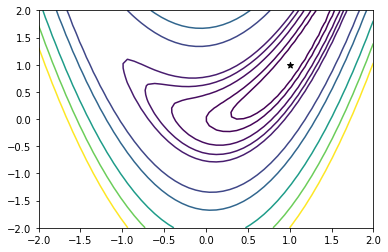

In [65]:
# rosenbrock banana function
x = np.linspace(-2,2,50)
X,Y = np.meshgrid(x,x)

def rosenbrock(X,Y):
    return (1-X)**2 + 5*(Y-X**2)**2

# def rosenbrock_grad(X,Y):
#     return (2*(10*X**3 - 10*X*Y + X -1), 10*(Y-X**2))

f = rosenbrock(X,Y)

# hessian at (1,1) is [[42, -20],[-20,10]]
def is_pos_def(x):
    return np.all(
        np.linalg.eigvals(x) > 0
        )
print("is hessian at (1,1) positive definite? {0}".format(is_pos_def(np.array([[42,-20],[-20,10]]))))

fig, ax = plt.subplots()
ax.contour(X,Y,f, levels=[.5,1,2,3,4,10,15,25,35,45])
plt.scatter(1,1,marker='*', color='k',s=40)
plt.show()

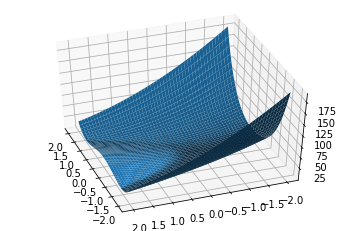

In [74]:
# use mplot3d for 3D plots
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,f)
ax.view_init(elev=45., azim=160)
plt.show()

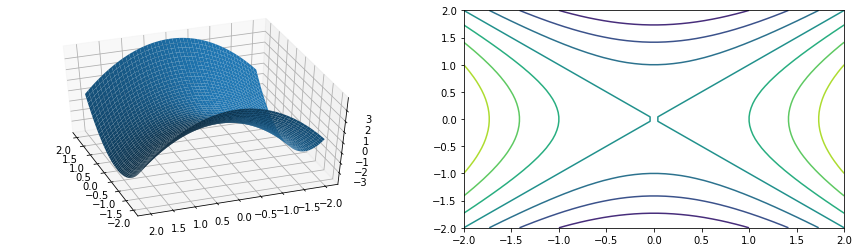

In [85]:
f2 = X**2 - Y**2

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(X,Y,f2)
ax.view_init(elev=45., azim=160)

ax2 = fig.add_subplot(122)
ax2.contour(X,Y,f2)

plt.show()

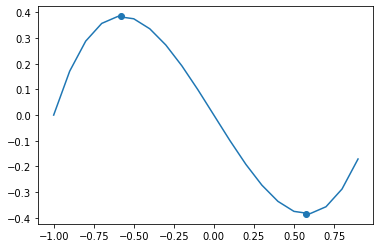

In [90]:
x = np.arange(-1,1,0.1)
y = x**3 - x
x2 = 1/np.sqrt(3)
x1 = -x2
plt.plot(x,y)
plt.scatter([x1, x2],[(x1)**3 - (x1), (x2)**3-(x2)])

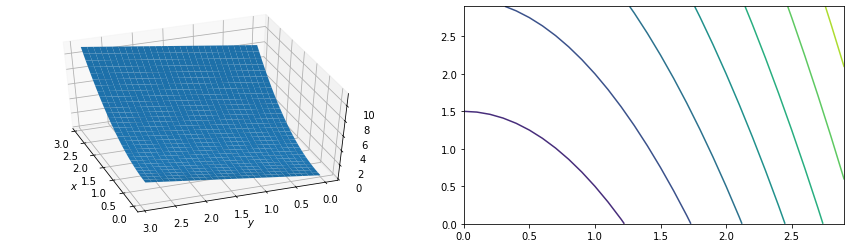

In [98]:
x = np.arange(0,3,0.1)
X,Y = np.meshgrid(x,x)
f3 = X**2 + Y

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(X,Y,f3)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.view_init(elev=45., azim=160)

ax2 = fig.add_subplot(122)
ax2.contour(X,Y,f3)

plt.show()

In [95]:
X.shape

(2500, 2500)